In [2]:
import copy
import math
import os
from collections import namedtuple

import gym
import ipywidgets as widgets
import matplotlib.pyplot as plt
import more_itertools as mitt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 4]

In [3]:
import matplotlib.pyplot as plt
import cv2


In [4]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [5]:
env.reset()[0]

array([-0.01162355, -0.04915872, -0.04403302,  0.0276858 ], dtype=float32)

In [6]:
env.step(1)
env.render()

/Users/dylanmarin/opt/anaconda3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [7]:
img = env.render()
def preprocess_frame(img, size=(400, 100)):
    # cut off parts of image that nothing is happening in
    img = img[150:300]

    # take just the G values
    img = img[:, :, 1]

    # make black and white
    img = np.where(img == 255, 1.0, 0.0)

    # resize
    img = cv2.resize(img, size, interpolation=cv2.INTER_CUBIC)

    return img


In [8]:
for i in tqdm.trange(1000):
    env.reset()
    img = env.render()
    preprocess_frame(img)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 682.76it/s]


([], [])

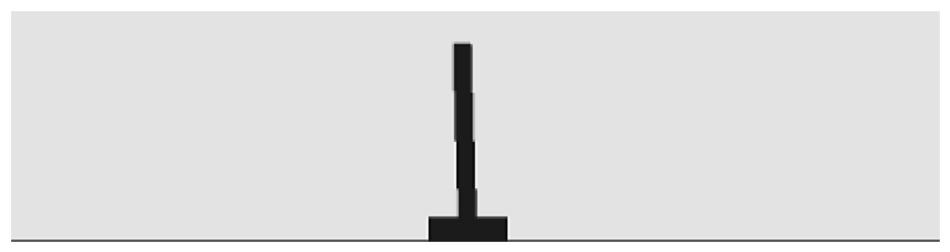

In [16]:


plt.imshow(img, cmap='gray')
plt.imshow(preprocess_frame(img), cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

In [10]:

img = env.render(mode='rgb_array')
        
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_rgb_resized = cv2.resize(img_rgb, (100,400), interpolation=cv2.INTER_CUBIC)
img_rgb_resized[img_rgb_resized < 255] = 0
img_rgb_resized = img_rgb_resized / 255

# image_memory = np.roll(self.image_memory, 1, axis = 0)
# image_memory[0,:,:] = img_rgb_resized

#self.imshow(self.image_memory,0)        
# np.expand_dims(self.image_memory, axis=0)

TypeError: render() got an unexpected keyword argument 'mode'